In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [49]:
df = pd.read_excel('construction_oxford_economics.xlsx')
df.head()

,Country,Name,Year,Value
0,Argentina,"Gross output (sales), Nominal USD",1996,17.45
1,Argentina,"Gross output (sales), Real USD",1996,39.70
2,Argentina,Gross output (sales),1996,366.59
3,Argentina,"Gross output (sales), Nominal LCU",1996,17.45
4,Argentina,"Investment, Nominal USD",1996,0.24


In [50]:
df['Name'].unique()

array(['Gross output (sales), Nominal USD',
       'Gross output (sales), Real USD', 'Gross output (sales)',
       'Gross output (sales), Nominal LCU', 'Investment, Nominal USD',
       'Investment, Nominal LCU', 'Investment', 'Investment, Real USD',
       'Production index', 'Value-added output, Nominal LCU',
       'Value-added output, As a percent of world total',
       'Value-added output', 'Value-added output, As a percent of GDP',
       'Value-added output, Real USD', 'Value-added output, Nominal USD',
       'Gross operating surplus (profits), Nominal USD',
       'Gross operating surplus (profits)'], dtype=object)

## Sales

In [51]:
df_sales = df[df['Name'] == 'Gross output (sales), Nominal USD']

In [52]:
df_sales_la = df_sales[df_sales['Country'].isin(['Chile', 'Colombia', 'Mexico'])]

In [53]:
import plotly.express as px
fig = px.line(df_sales_la, x="Year", y="Value", color='Country')
fig.show()

## Profit margin

In [54]:
df['Name'].unique()

array(['Gross output (sales), Nominal USD',
       'Gross output (sales), Real USD', 'Gross output (sales)',
       'Gross output (sales), Nominal LCU', 'Investment, Nominal USD',
       'Investment, Nominal LCU', 'Investment', 'Investment, Real USD',
       'Production index', 'Value-added output, Nominal LCU',
       'Value-added output, As a percent of world total',
       'Value-added output', 'Value-added output, As a percent of GDP',
       'Value-added output, Real USD', 'Value-added output, Nominal USD',
       'Gross operating surplus (profits), Nominal USD',
       'Gross operating surplus (profits)'], dtype=object)

In [55]:
df_profit = df[df['Name'] == 'Gross operating surplus (profits), Nominal USD']
df_profit['Country'].unique()

array(['Brazil', 'Canada', 'Mexico', 'United States'], dtype=object)

In [56]:
df_profit

,Country,Name,Year,Value
15,Brazil,"Gross operating surplus (profits), Nominal USD",1996,42.86
32,Canada,"Gross operating surplus (profits), Nominal USD",1996,5.94
82,Mexico,"Gross operating surplus (profits), Nominal USD",1996,17.17
110,United States,"Gross operating surplus (profits), Nominal USD",1996,106.13
153,Brazil,"Gross operating surplus (profits), Nominal USD",1997,46.74
...,...,...,...,...
4802,United States,"Gross operating surplus (profits), Nominal USD",2030,479.92
4845,Brazil,"Gross operating surplus (profits), Nominal USD",2031,37.86
4862,Canada,"Gross operating surplus (profits), Nominal USD",2031,43.62
4912,Mexico,"Gross operating surplus (profits), Nominal USD",2031,117.22


In [57]:
df_sales.rename(columns={'Value':'Sales'}, inplace = True)
df_sales.drop(columns=['Name'], inplace = True)
df_profit.rename(columns={'Value':'Profit'}, inplace = True)
df_profit.drop(columns=['Name'], inplace = True)

C:\Users\danie\AppData\Local\Temp\ipykernel_10076\1473441566.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\danie\AppData\Local\Temp\ipykernel_10076\1473441566.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\danie\AppData\Local\Temp\ipykernel_10076\1473441566.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\danie\AppData\Local\Temp\ipykernel_10076\1473441566.py:4: SettingWithCopyWarning:


A value

In [58]:
df_profit

,Country,Year,Profit
15,Brazil,1996,42.86
32,Canada,1996,5.94
82,Mexico,1996,17.17
110,United States,1996,106.13
153,Brazil,1997,46.74
...,...,...,...
4802,United States,2030,479.92
4845,Brazil,2031,37.86
4862,Canada,2031,43.62
4912,Mexico,2031,117.22


In [59]:
df_merge = df_profit.merge(df_sales, how = 'left', on = ['Year', 'Country'])
df_merge

,Country,Year,Profit,Sales
0,Brazil,1996,42.86,107.26
1,Canada,1996,5.94,85.61
2,Mexico,1996,17.17,48.02
3,United States,1996,106.13,666.80
4,Brazil,1997,46.74,116.98
...,...,...,...,...
139,United States,2030,479.92,3061.59
140,Brazil,2031,37.86,158.17
141,Canada,2031,43.62,619.35
142,Mexico,2031,117.22,288.06


In [60]:
df_merge['Margin'] = df_merge['Profit'] / df_merge['Sales']
df_merge

,Country,Year,Profit,Sales,Margin
0,Brazil,1996,42.86,107.26,0.399590
1,Canada,1996,5.94,85.61,0.069384
2,Mexico,1996,17.17,48.02,0.357559
3,United States,1996,106.13,666.80,0.159163
4,Brazil,1997,46.74,116.98,0.399555
...,...,...,...,...,...
139,United States,2030,479.92,3061.59,0.156755
140,Brazil,2031,37.86,158.17,0.239363
141,Canada,2031,43.62,619.35,0.070429
142,Mexico,2031,117.22,288.06,0.406929


In [61]:
fig = px.line(df_merge, x="Year", y="Margin", color='Country')
fig.show()

<AxesSubplot: xlabel='Year'>

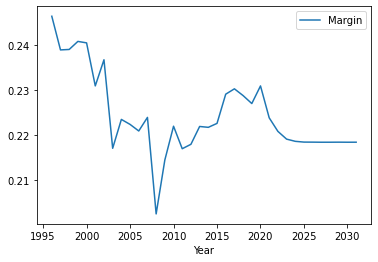

In [68]:
df_merge_g = df_merge.groupby('Year')[['Margin']].mean()
df_merge_g.plot()

In [70]:
df_merge_g.to_excel('margen_construccion_america.xlsx')